In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
import joblib

In [3]:
# Load Data and Model
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

model = joblib.load('../models/best_model.pkl')
print("Model and data loaded.")

Model and data loaded.


In [4]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [5]:
## Performance Metrics


In [6]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.97      0.72      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.95      0.86      0.89      6484
weighted avg       0.94      0.93      0.93      6484

ROC AUC: 0.9344456419271261


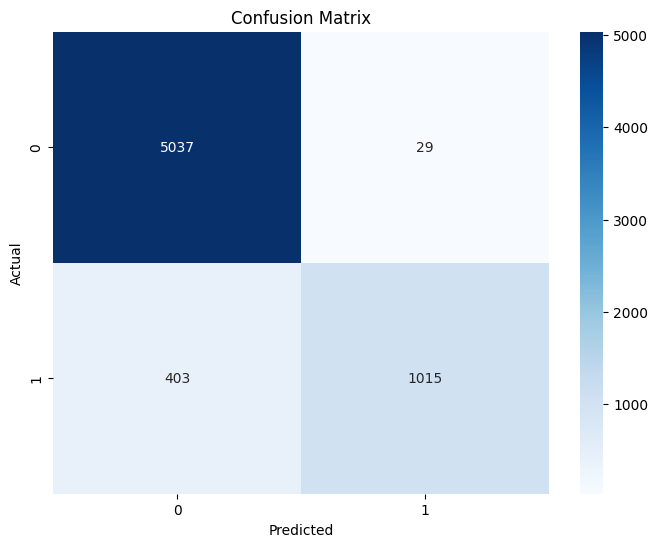

In [7]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

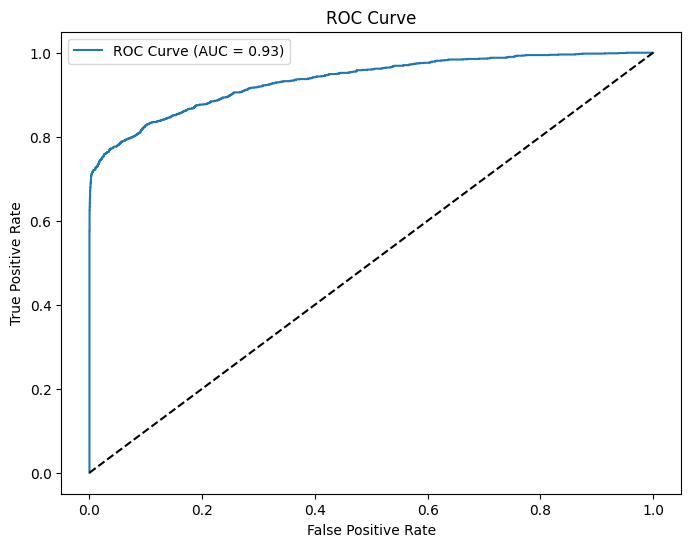

In [8]:
## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

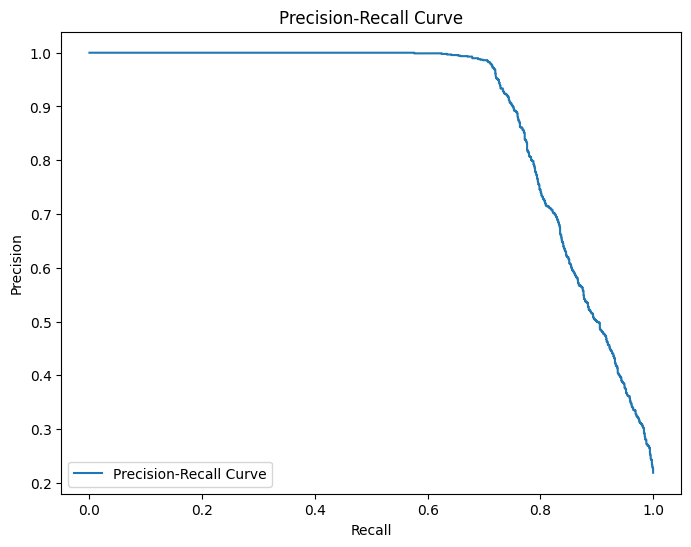

In [9]:
## Precision-Recall Curv
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

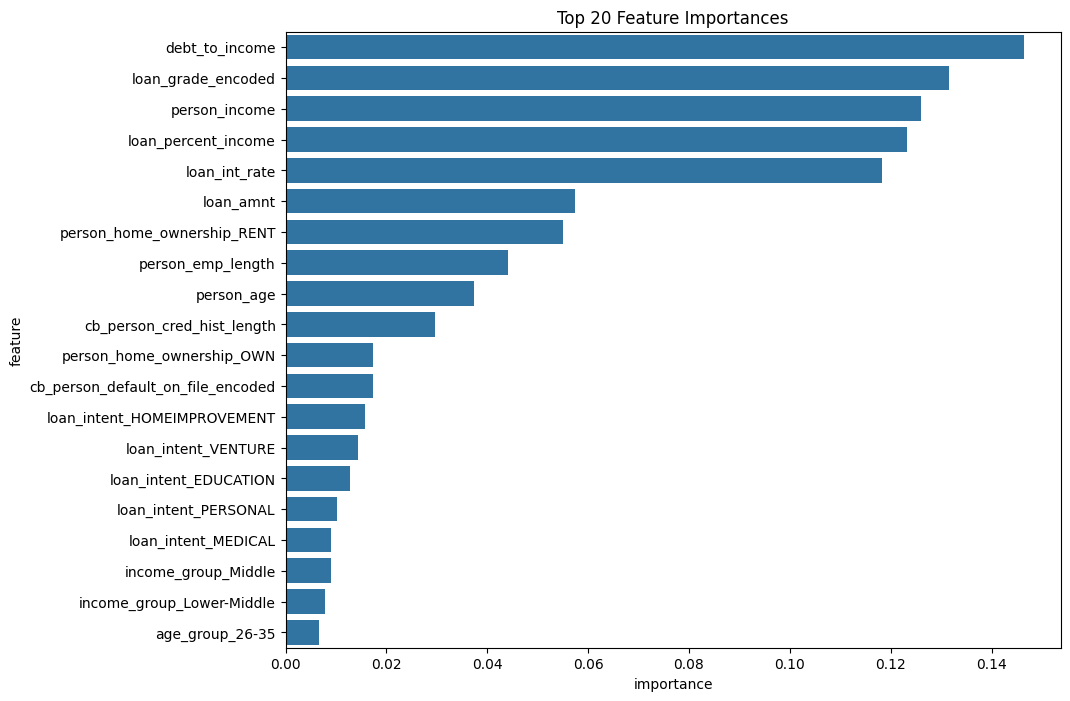

In [10]:
## Feature Importance
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_test.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Feature Importances')
    plt.show()
else:
    print("Model does not have feature_importances_ attribute.")

In [ ]:
## Feature Importance
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_test.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Feature Importances')
    plt.show()
else:
    print("Model does not have feature_importances_ attribute.")

Number of misclassifications: 432
Sample misclassified cases:
    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1     0.359953       0.675782          -1.191291  -0.738434  -5.761794e-16   
20   -0.915071      -0.485235          -0.191126   0.064238   1.111696e-01   
21    0.041197      -0.404608           1.559164  -0.884734   2.472512e+00   
22    1.475598       0.192025          -1.191291  -0.631674  -8.993376e-02   
43   -0.277559      -0.485235          -0.191126  -0.410248   9.609932e-01   

    loan_percent_income  cb_person_cred_hist_length  debt_to_income  \
1             -1.125826                    0.785595       -1.167327   
20             1.027524                   -0.938982        1.000933   
21            -0.657707                   -0.199878       -0.682088   
22            -0.938579                    1.524699       -0.922714   
43             0.184908                   -0.938982        0.222694   

    loan_grade_encoded  cb_person_default_

In [ ]:
## SHAP Model Interpretability
import shap

# Calculate SHAP values
print("Calculating SHAP values...")
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, max_display=20, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Predictions')
plt.tight_layout()
plt.show()

# SHAP feature importance plot
plt.figure(figsize=(10, 8))
shap.plots.bar(shap_values, max_display=20, show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Explain individual predictions
print("\nIndividual Prediction Explanations:")
print("=" * 50)

# Find a high-risk prediction (high probability of default)
high_risk_idx = y_pred_proba.argsort()[-1]
print(f"\nHigh Risk Prediction (Index {high_risk_idx}):")
print(f"Actual: {y_test.iloc[high_risk_idx]}")
print(f"Predicted: {y_pred[high_risk_idx]}")
print(f"Probability: {y_pred_proba[high_risk_idx]:.4f}")

# SHAP waterfall plot for high-risk case
plt.figure(figsize=(10, 8))
shap.plots.waterfall(shap_values[high_risk_idx], max_display=15, show=False)
plt.title(f'SHAP Waterfall - High Risk Case (Index {high_risk_idx})')
plt.tight_layout()
plt.show()

# Find a low-risk prediction (low probability of default)
low_risk_idx = y_pred_proba.argsort()[0]
print(f"\nLow Risk Prediction (Index {low_risk_idx}):")
print(f"Actual: {y_test.iloc[low_risk_idx]}")
print(f"Predicted: {y_pred[low_risk_idx]}")
print(f"Probability: {y_pred_proba[low_risk_idx]:.4f}")

# SHAP waterfall plot for low-risk case
plt.figure(figsize=(10, 8))
shap.plots.waterfall(shap_values[low_risk_idx], max_display=15, show=False)
plt.title(f'SHAP Waterfall - Low Risk Case (Index {low_risk_idx})')
plt.tight_layout()
plt.show()

## Error Analysis